In [1]:
# 필요한 객체 import
import pandas as pd
from konlpy.tag import Okt

In [2]:
#!/usr/bin/env python
#-*- coding:utf-8 -*-

# 한글 영화 리뷰 데이터를 불러옴

train = pd.read_csv('~/data/ratings_train.txt', 
                    header=0, delimiter='\t', quoting=3,encoding='CP949')
test = pd.read_csv('~/data/ratings_test.txt', 
                   header=0, delimiter='\t', quoting=3,encoding='CP949')

print(train.shape)

print(train['document'].size)

print(test.shape)

print(test['document'].size)

train.head(10)

(150000, 3)
150000
(50000, 3)
50000


,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
5,5403919,막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.,0
6,7797314,원작의 긴장감을 제대로 살려내지못했다.,0
7,9443947,별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단...,0
8,7156791,액션이 없는데도 재미 있는 몇안되는 영화,1
9,5912145,왜케 평점이 낮은건데? 꽤 볼만한데.. 헐리우드식 화려함에만 너무 길들여져 있나?,1


In [3]:
pos_tagger = Okt()

# 품사 태깅 및 토큰화를 위한 함수

def tokenize(doc):
    # norm, stem은 optional
    if type(doc) is not str:
        return []
    return ['/'.join(t) for t in pos_tagger.pos(doc, norm=True, stem=True)]

tokenized_list = []

# 전체 training data set 15만 개

for i in range(0,150000) :
    if i%10000 == 0: # 10000 개의 document마다 진행상황 표시
        print(i,'\n')
    review = tokenize(train["document"][i])
    tokenized_list.append(review) # 토큰화 된 리뷰를 리스트에 담아줌
    
print(tokenized_list)

#train_docs = [(tokenize(["document"]), row[2]) for row in train]
#test_docs = [(tokenize(row[1]), row[2]) for row in test]
# 잘 들어갔는지 확인
# => [(['아/Exclamation',
#   '더빙/Noun',
#   '../Punctuation',
#   '진짜/Noun',
#   '짜증/Noun',
#   '나다/Verb',
#   '목소리/Noun'],
#  '0')]

0 

10000 

20000 

30000 

40000 

50000 

60000 

70000 

80000 

90000 

100000 

110000 

120000 

130000 

140000 



IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [4]:
# 품사 태깅된 단어들이 잘 tokenize 되었는지 확인
print(tokenized_list[:10])

[['아/Exclamation', '더빙/Noun', '../Punctuation', '진짜/Noun', '짜증나다/Adjective', '목소리/Noun'], ['흠/Noun', '.../Punctuation', '포스터/Noun', '보고/Noun', '초딩/Noun', '영화/Noun', '줄/Noun', '..../Punctuation', '오버/Noun', '연기/Noun', '조차/Josa', '가볍다/Adjective', '않다/Verb'], ['너/Modifier', '무재/Noun', '밓었/Noun', '다그/Noun', '래서/Noun', '보다/Verb', '추천/Noun', '한/Josa', '다/Adverb'], ['교도소/Noun', '이야기/Noun', '구먼/Noun', '../Punctuation', '솔직하다/Adjective', '재미/Noun', '는/Josa', '없다/Adjective', '../Punctuation', '평점/Noun', '조정/Noun'], ['사이/Modifier', '몬페/Noun', '그/Determiner', '의/Noun', '익살스럽다/Adjective', '연기/Noun', '가/Josa', '돋보이다/Verb', '영화/Noun', '!/Punctuation', '스파이더맨/Noun', '에서/Josa', '늙다/Verb', '보이다/Verb', '하다/Verb', '커스틴/Noun', '던스트/Noun', '가/Josa', '너무나도/Adverb', '이쁘다/Adjective', '보이다/Verb'], ['막/Noun', '걸음/Noun', '마/Noun', '떼다/Verb', '3/Number', '세/Noun', '부터/Josa', '초등학교/Noun', '1/Number', '학년/Noun', '생인/Noun', '8/Number', '살다/Verb', '영화/Noun', './Punctuation', 'ㅋㅋㅋ/KoreanParticle', '.../Punctuation', '별

In [5]:
import logging
logging.basicConfig(
    format='%(asctime)s : %(levelname)s : %(message)s',
    level=logging.INFO)

In [6]:
#하이퍼 파라메터 값 지정
num_features = 200 # 문자 벡터 차원수
min_word_count = 40 # 최소 문자 수
num_workers = 4 # 병렬 쓰레드 수
context = 10 # window size
downsampling = 1e-3 # 문자 빈도 수 downsample

# 초기화 및 모델 학습
from gensim.models import word2vec

#모델 학습
model = word2vec.Word2Vec(tokenized_list,
                                                  workers = num_workers,
                                                  size = num_features,
                                                  min_count = min_word_count,
                                                  window = context,
                                                  sample = downsampling)


2019-06-06 12:36:42,687 : INFO : 'pattern' package not found; tag filters are not available for English
2019-06-06 12:36:42,694 : INFO : collecting all words and their counts
2019-06-06 12:36:42,695 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-06-06 12:36:42,771 : INFO : PROGRESS: at sentence #10000, processed 146795 words, keeping 13496 word types
2019-06-06 12:36:42,827 : INFO : PROGRESS: at sentence #20000, processed 289797 words, keeping 19101 word types
2019-06-06 12:36:42,895 : INFO : PROGRESS: at sentence #30000, processed 435241 words, keeping 23273 word types
2019-06-06 12:36:42,952 : INFO : PROGRESS: at sentence #40000, processed 582173 words, keeping 26843 word types
2019-06-06 12:36:43,009 : INFO : PROGRESS: at sentence #50000, processed 725793 words, keeping 29853 word types
2019-06-06 12:36:43,070 : INFO : PROGRESS: at sentence #60000, processed 869124 words, keeping 32425 word types
2019-06-06 12:36:43,133 : INFO : PROGRESS: at sentence

In [7]:
model

In [8]:
# 학습이 완료 되면 필요없는 메모리를 unload 시킨다.
model.init_sims(replace=True)

model_name = 'Word2Vec_Kor'
# model_name = '300features_50minwords_20text'
model.save(model_name)
model.wv.save_word2vec_format('my.embedding', binary=False)

2019-06-06 12:37:23,695 : INFO : precomputing L2-norms of word weight vectors
2019-06-06 12:37:23,729 : INFO : saving Word2Vec object under Word2Vec_Kor, separately None
2019-06-06 12:37:23,731 : INFO : not storing attribute vectors_norm
2019-06-06 12:37:23,732 : INFO : not storing attribute cum_table
2019-06-06 12:37:23,861 : INFO : saved Word2Vec_Kor
2019-06-06 12:37:23,862 : INFO : storing 4045x200 projection weights into my.embedding


In [15]:
from gensim.models.keyedvectors import KeyedVectors
model = KeyedVectors.load_word2vec_format('my.embedding', binary=False, encoding='utf-8')

2019-06-06 12:43:22,867 : INFO : loading projection weights from my.embedding


LookupError: unknown encoding: unicode

In [53]:
# 참고 https://stackoverflow.com/questions/43776572/visualise-word2vec-generated-from-gensim
from sklearn.manifold import TSNE
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import gensim 
import gensim.models as g

# 그래프에서 한글 깨지는 문제에 대한 대처
#font_name = font_manager.FontProperties(fname = "/Users/LEE/Library/Fonts/BMYEONSUNG.ttf").get_name()
rc('font', family = 'AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

model_name = 'Word2Vec_Kor'
model = g.Doc2Vec.load(model_name)

vocab = list(model.wv.vocab)
X = model[vocab]

print(len(X))
print(X[0][:10])
tsne = TSNE(n_components=2)

# 100개의 단어에 대해서만 시각화
X_tsne = tsne.fit_transform(X[:100,:])
# X_tsne = tsne.fit_transform(X)

2019-06-06 14:57:05,340 : INFO : loading Doc2Vec object from Word2Vec_Kor
2019-06-06 14:57:05,432 : INFO : loading wv recursively from Word2Vec_Kor.wv.* with mmap=None
2019-06-06 14:57:05,433 : INFO : setting ignored attribute vectors_norm to None
2019-06-06 14:57:05,434 : INFO : loading vocabulary recursively from Word2Vec_Kor.vocabulary.* with mmap=None
2019-06-06 14:57:05,435 : INFO : loading trainables recursively from Word2Vec_Kor.trainables.* with mmap=None
2019-06-06 14:57:05,437 : INFO : setting ignored attribute cum_table to None
2019-06-06 14:57:05,438 : INFO : loaded Word2Vec_Kor
/Users/LEE/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


4045
[-0.07767377 -0.07477116  0.05116425  0.02562833  0.08132394  0.03884108
  0.05085805  0.0895922   0.03269578 -0.08935755]


In [51]:
import matplotlib.font_manager as fm
font_list_mac = fm.OSXInstalledFonts()
print(len(font_list_mac))
print(font_list_mac)
[(f.name,f.fname) for f in fm.fontManager.ttflist if 'Nanum' in f.name]

165
['/Library/Fonts/Andale Mono.ttf', '/Library/Fonts/Apple Chancery.ttf', '/Library/Fonts/AppleGothic.ttf', '/Library/Fonts/AppleMyungjo.ttf', '/Library/Fonts/Arial Black.ttf', '/Library/Fonts/Arial Bold Italic.ttf', '/Library/Fonts/Arial Bold.ttf', '/Library/Fonts/Arial Italic.ttf', '/Library/Fonts/Arial Narrow Bold Italic.ttf', '/Library/Fonts/Arial Narrow Bold.ttf', '/Library/Fonts/Arial Narrow Italic.ttf', '/Library/Fonts/Arial Narrow.ttf', '/Library/Fonts/Arial Rounded Bold.ttf', '/Library/Fonts/Arial Unicode.ttf', '/Library/Fonts/Arial.ttf', '/Library/Fonts/Ayuthaya.ttf', '/Library/Fonts/BigCaslon.ttf', '/Library/Fonts/Bodoni 72 Smallcaps Book.ttf', '/Library/Fonts/Bodoni Ornaments.ttf', '/Library/Fonts/Bradley Hand Bold.ttf', '/Library/Fonts/Brush Script.ttf', '/Library/Fonts/Chalkduster.ttf', '/Library/Fonts/Comic Sans MS Bold.ttf', '/Library/Fonts/Comic Sans MS.ttf', '/Library/Fonts/Courier New Bold Italic.ttf', '/Library/Fonts/Courier New Bold.ttf', '/Library/Fonts/Courier 

[]

In [41]:
df = pd.DataFrame(X_tsne, index=vocab[:100], columns = ['x','y'])
df.shape

(100, 2)

In [42]:
# 한글 임베딩 된 단어들 확인
df.head(15)

,x,y
아/Exclamation,2.621500,5.764204
더빙/Noun,1.177420,1.528340
../Punctuation,5.324892,8.786065
진짜/Noun,3.768933,5.945405
짜증나다/Adjective,2.127118,2.926959
목소리/Noun,-0.285664,0.917385
흠/Noun,-2.904363,-2.485371
.../Punctuation,4.749245,8.396575
포스터/Noun,2.697732,1.377289
보고/Noun,6.122737,3.116517


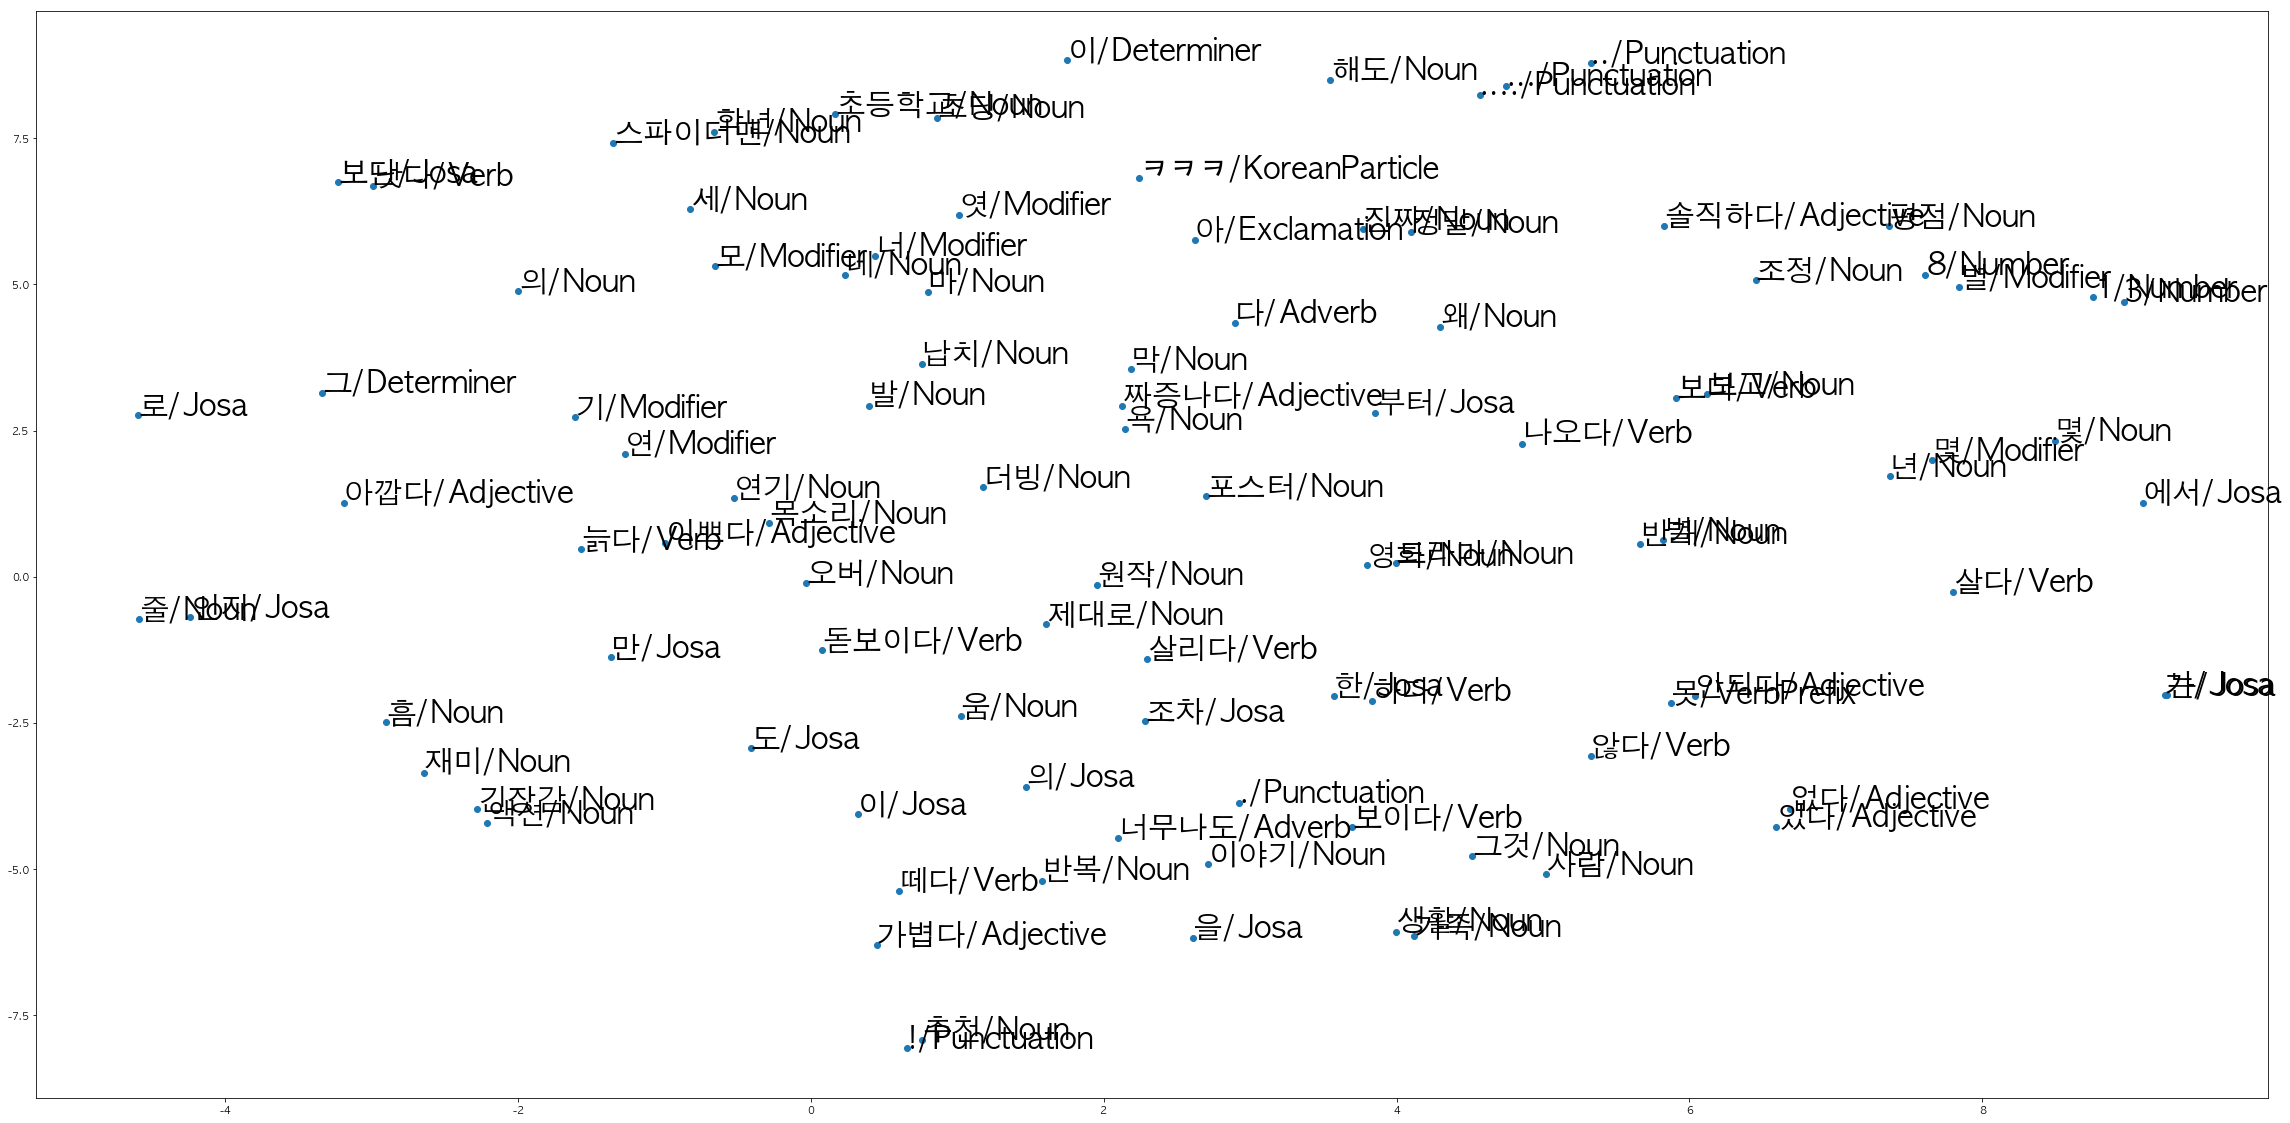

In [54]:
fig = plt.figure()
fig.set_size_inches(40, 20)
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'])

for word, pos in df.iterrows():
    ax.annotate(word, pos, fontsize=30)
plt.show()

In [14]:
print(model.vocabulary.raw_vocab)

defaultdict(<class 'int'>, {})


In [ ]:
model.save('Word2vecKor.model')

In [ ]:
model.most_similar('팝콘/Noun')